# Load dataset

In [1]:
import pandas as pd

In [2]:
raw_df = pd.read_csv("data/X.csv", header=None)

### Fix column headers
The wavelengths file `Wavelength.csv` represents the corresponding wavelength for each column in the input

In [3]:
# Put wavelengths as columns headers
wavelengths = pd.read_csv("data/Wavelength.csv", header=None)
wavelengths_df = raw_df.rename(columns=wavelengths.T.loc[0])

### Read output values

In [4]:
y = pd.read_csv("data/y.csv", header=None)

# Turn pandas rows into single vector
y = y[0]

# Split into training and test set

In [5]:
from sklearn.model_selection import train_test_split

# Split with stratify on y
X_train, X_test, y_train, y_test = train_test_split(wavelengths_df, y, stratify=y, test_size = 0.3, random_state=32)

# Preprocessing

## Data visualisation

In [6]:
import matplotlib.pyplot as plt

### Visualise dataset

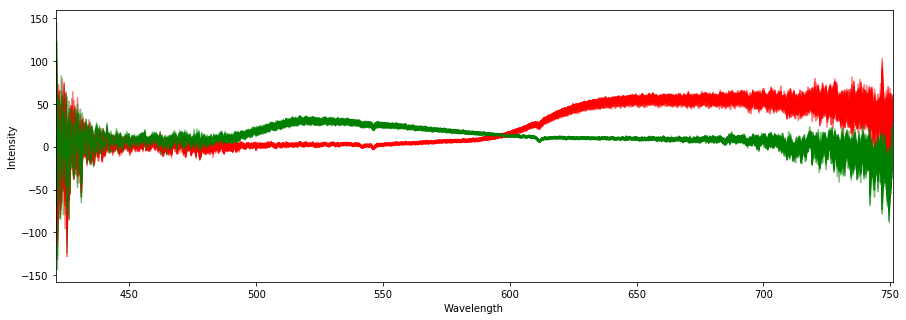

In [7]:
# Plot colours based on actual values from y_train
plt.figure(figsize=(15,5))
for i,row in X_train.iterrows():
    if y_train[i] == 0:
        color = 'g'
    else:
        color = 'r'
    ax = row.plot(color=color, alpha=0.5)
    ax.set_xlabel("Wavelength")
    ax.set_ylabel("Intensity")
plt.show()

### Plot correlation of each input feature

In [8]:
# Add output column to check correlation
correlation_data = X_train.assign(output=y_train)

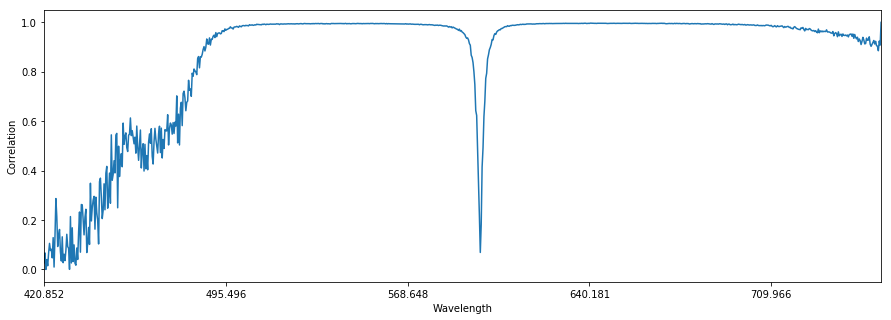

In [9]:
plt.figure(figsize=(15,5))
ax = correlation_data.corr()["output"].map(abs).plot()
ax.set_xlabel("Wavelength")
ax.set_ylabel("Correlation")
plt.show()

### Plot histogram of single input feature

In [10]:
def inputfeature_hist(feature, X, y):
    oneX = X[[X.columns[feature]]]
    oneX["output"] = y
    
    # Plot figure, filtering colours by actual output values
    ax = oneX[oneX["output"] == 0][oneX.columns[0]].plot.hist(color='g', alpha=0.3, bins=25)
    ax = oneX[oneX["output"] == 1][oneX.columns[0]].plot.hist(color='r', alpha=0.3, bins=25)
    ax.set_xlabel("Intensity")
    ax.set_title("Input feature wavelength " + str(X.columns[feature]))
    plt.show()

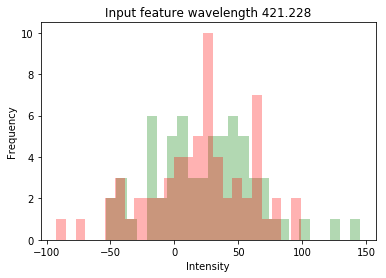

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Example of bad correlation
inputfeature_hist(1, X_train, y_train)

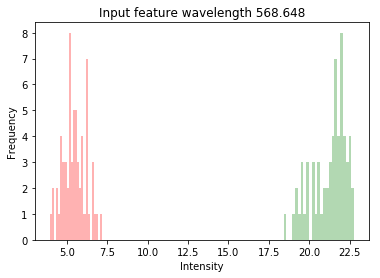

In [12]:
# Example of good correlation
inputfeature_hist(400, X_train, y_train)

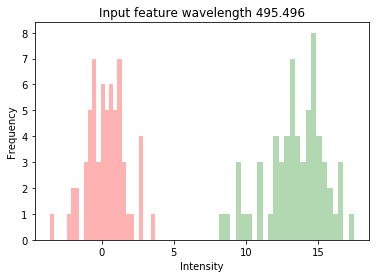

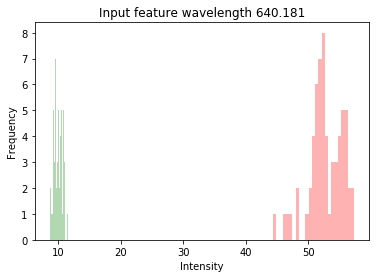

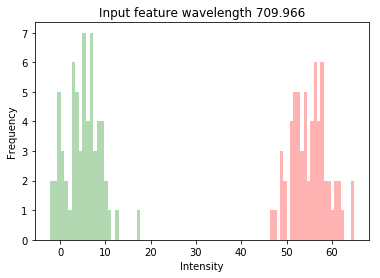

In [13]:
# Further examples
feature_indices = [200,600,800]

for i in feature_indices:
    inputfeature_hist(i, X_train, y_train)

# Training

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train and get accuracy using simple Logistic Regression on a single input feature
def train_and_test_lr(feature_index, X, y):
    oneX = X[[X.columns[feature_index]]]
    
    lr = LogisticRegression()
    lr.fit(oneX, y)
    
    predictions = lr.predict(oneX)
    accuracy = accuracy_score(y, predictions)
    
    print("Training on single input feature  - Wavelength " + str(X.columns[feature_index]))
    print("Training accuracy: " + str(accuracy))
    
    return lr

In [15]:
# Try single input features that were visualised earlier
feature_indices = [1, 200, 400, 600, 800]

for i in feature_indices:
    train_and_test_lr(i, X_train, y_train)
    print("")

Training on single input feature  - Wavelength 421.228
Training accuracy: 0.5

Training on single input feature  - Wavelength 495.496
Training accuracy: 1.0

Training on single input feature  - Wavelength 568.648
Training accuracy: 1.0

Training on single input feature  - Wavelength 640.181
Training accuracy: 1.0

Training on single input feature  - Wavelength 709.966
Training accuracy: 1.0



### Cross validation
Try using k-fold cross validation to reduce overfitting

In [16]:
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

def train_and_test_lrcv(feature_index, X, y, cv):
    oneX = X[[X.columns[feature_index]]]
    
    predictions = cross_val_predict(LogisticRegression(), oneX, y, cv=cv)
    accuracy = cross_val_score(LogisticRegression(), oneX, y=y, cv=cv, scoring="accuracy")
    
    print("Training on single input feature - Wavelength " + str(X.columns[feature_index]))
    print("Cross validation scores with " + str(cv) + "-fold:")
    print(str(accuracy))
    print(str(np.mean(accuracy)))

In [17]:
# Use 5-fold cross validation 
for i in feature_indices:
    train_and_test_lrcv(i, X_train, y_train, 5)
    print("")

Training on single input feature - Wavelength 421.228
Cross validation scores with 5-fold:
[ 0.5         0.46153846  0.5         0.5         0.54166667]
0.500641025641

Training on single input feature - Wavelength 495.496
Cross validation scores with 5-fold:
[ 1.  1.  1.  1.  1.]
1.0

Training on single input feature - Wavelength 568.648
Cross validation scores with 5-fold:
[ 1.  1.  1.  1.  1.]
1.0

Training on single input feature - Wavelength 640.181
Cross validation scores with 5-fold:
[ 1.  1.  1.  1.  1.]
1.0

Training on single input feature - Wavelength 709.966
Cross validation scores with 5-fold:
[ 1.  1.  1.  1.  1.]
1.0



In [18]:
# Use 10-fold cross validation 
for i in feature_indices:
    train_and_test_lrcv(i, X_train, y_train, 10)

Training on single input feature - Wavelength 421.228
Cross validation scores with 10-fold:
[ 0.42857143  0.57142857  0.5         0.33333333  0.41666667  0.66666667
  0.5         0.5         0.5         0.5       ]
0.491666666667
Training on single input feature - Wavelength 495.496
Cross validation scores with 10-fold:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0
Training on single input feature - Wavelength 568.648
Cross validation scores with 10-fold:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0
Training on single input feature - Wavelength 640.181
Cross validation scores with 10-fold:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0
Training on single input feature - Wavelength 709.966
Cross validation scores with 10-fold:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0


In [19]:
# Try higher k-fold
for i in feature_indices:
    train_and_test_lrcv(i, X_train, y_train, 25)

Training on single input feature - Wavelength 421.228
Cross validation scores with 25-fold:
[ 0.5         0.5         0.33333333  0.5         0.5         0.5
  0.66666667  0.5         0.16666667  0.5         0.33333333  0.66666667
  0.66666667  0.5         0.75        0.25        0.75        0.          0.75
  0.25        0.75        0.75        0.5         0.25        0.75      ]
0.503333333333
Training on single input feature - Wavelength 495.496
Cross validation scores with 25-fold:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]
1.0
Training on single input feature - Wavelength 568.648
Cross validation scores with 25-fold:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]
1.0
Training on single input feature - Wavelength 640.181
Cross validation scores with 25-fold:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]
1.0
Trai

### Less training samples
Use less training samples to confirm model is not overfitting to training data

In [20]:
# Further split training set
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_train, y_train, test_size = 0.9, random_state=34)

print("Small training set size: " + str(len(X_train_small)))
print("Small testing set size: " + str(len(X_test_small)))

Small training set size: 12
Small testing set size: 114


In [21]:
for i in feature_indices:
    lr = train_and_test_lr(i, X_train_small, y_train_small)
    
    predictions = lr.predict(X_test_small[[X_test_small.columns[i]]])
    accuracy = accuracy_score(y_test_small, predictions)
    print("Testing accuracy: " + str(accuracy) + "\n")

Training on single input feature  - Wavelength 421.228
Training accuracy: 0.666666666667
Testing accuracy: 0.464912280702

Training on single input feature  - Wavelength 495.496
Training accuracy: 1.0
Testing accuracy: 0.982456140351

Training on single input feature  - Wavelength 568.648
Training accuracy: 1.0
Testing accuracy: 0.991228070175

Training on single input feature  - Wavelength 640.181
Training accuracy: 1.0
Testing accuracy: 1.0

Training on single input feature  - Wavelength 709.966
Training accuracy: 1.0
Testing accuracy: 1.0



### Less input features
Confirmation of using one input feature is strong enough for this problem

In [22]:
from sklearn.feature_selection import RFECV

# Recursive feature elimination to find best number of features
lr_rfecv = LogisticRegression()
rfecv = RFECV(lr_rfecv, step=1, scoring="accuracy", cv=3)
rfecv.fit(X_train, y_train)

RFECV(cv=3,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

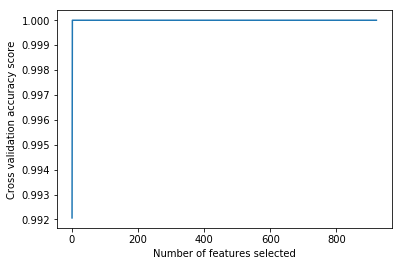

In [23]:
# Plot all features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy score")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

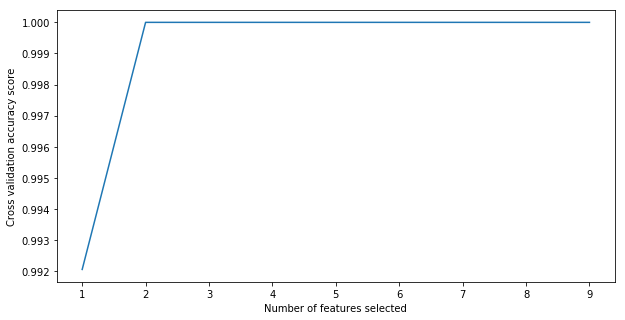

In [24]:
# Only up to 10 features to get closer look at the graph
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy score")
plt.plot(range(1, 10), rfecv.grid_scores_[:9])
plt.show()

### Accuracy of each single input feature

In [25]:
# Train on every single input feature to show accuracy graph
wavelength_accuracy = []
for col_key in X_train.columns:
    oneX = X_train[[col_key]]
    lr = LogisticRegression()
    lr.fit(oneX, y_train)
    
    predictions = lr.predict(oneX)
    accuracy = accuracy_score(y_train, predictions)
    
    wavelength_accuracy.append((col_key,accuracy))

acc_df = pd.DataFrame(wavelength_accuracy, columns=["Wavelength", "Accuracy"])

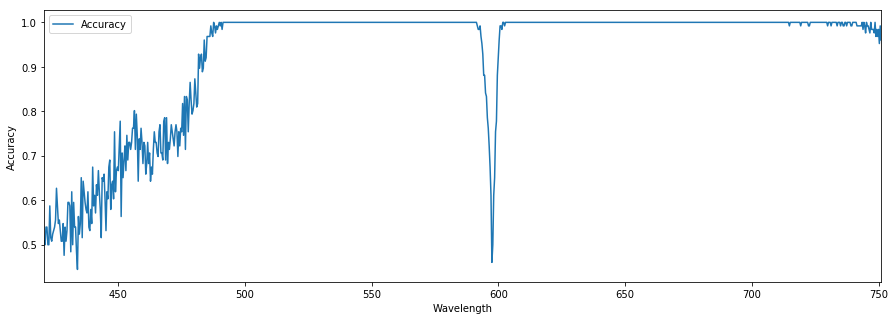

In [26]:
plt.figure(figsize=(15,5))
ax = acc_df.plot(x="Wavelength", y="Accuracy", figsize=(15,5))
ax.set_ylabel("Accuracy")
plt.show()

### Decision Tree

In [27]:
from sklearn import tree

# Use decision tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_small, y_train_small)

predictions = clf.predict(X_test_small)
accuracy_score(y_test_small, predictions)

1.0

In [34]:
# Feature importance in decision tree shows only 1 feature needed to decide
clf.feature_importances_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

# Run models on test data
Expected perfect classification for all except the first feature index, which is here to show an example of a bad input feature that is expected to not get good results.

In [28]:
for i in feature_indices:
    lr_model = train_and_test_lr(i, X_train, y_train)
    
    predictions = lr_model.predict(X_test[[X_test.columns[i]]])
    accuracy = accuracy_score(predictions, y_test)
    
    print("Test accuracy: " + str(accuracy) + "\n")

Training on single input feature  - Wavelength 421.228
Training accuracy: 0.5
Test accuracy: 0.407407407407

Training on single input feature  - Wavelength 495.496
Training accuracy: 1.0
Test accuracy: 1.0

Training on single input feature  - Wavelength 568.648
Training accuracy: 1.0
Test accuracy: 1.0

Training on single input feature  - Wavelength 640.181
Training accuracy: 1.0
Test accuracy: 1.0

Training on single input feature  - Wavelength 709.966
Training accuracy: 1.0
Test accuracy: 1.0



# Run model on XToClassify

In [29]:
XToClassify = pd.read_csv("data/XToClassify.csv", header=None)

XToClassify = XToClassify.rename(columns=wavelengths.T.loc[0])

In [30]:
import csv

for i in feature_indices:
    lr_model = train_and_test_lr(i, X_train, y_train)
    
    wavelength = XToClassify.columns[i]
    predictions = lr_model.predict(XToClassify[[wavelength]])
    
    output_file = open("PredictedClasses" + str(wavelength) + ".csv", "w")
    writer = csv.writer(output_file, delimiter=",")
    for p in predictions:
        writer.writerow([p])
    output_file.flush()
    output_file.close()

Training on single input feature  - Wavelength 421.228
Training accuracy: 0.5
Training on single input feature  - Wavelength 495.496
Training accuracy: 1.0
Training on single input feature  - Wavelength 568.648
Training accuracy: 1.0
Training on single input feature  - Wavelength 640.181
Training accuracy: 1.0
Training on single input feature  - Wavelength 709.966
Training accuracy: 1.0
